**Import all the Necessary Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Datasets**

In [28]:
#Load the Training Dataset
train=pd.read_csv('C:/Users/hp/Calorie Predict Expenditure/CPE/Data/train.csv')
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [29]:
#Load the Test Dataset
test=pd.read_csv('C:/Users/hp/Calorie Predict Expenditure/test.csv')
test

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7


**Handling Missing Values**

In [30]:
train.isnull().sum() # Check the count of missing values in each column in the training Data

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [31]:
test.isnull().sum()# Check the count of missing values in each column in the test Data

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [32]:
test.dtypes

id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

**Encoding Feature Variable(X)**

In [33]:
from sklearn.preprocessing import LabelEncoder #Encode the Independent Variable
le = LabelEncoder()
train['Sex']= le.fit_transform(train['Sex'])
test['Sex']= le.fit_transform(test['Sex'])

In [34]:
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0


In [35]:
test

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,1,45,177.0,81.0,7.0,87.0,39.8
1,750001,1,26,200.0,97.0,20.0,101.0,40.5
2,750002,0,29,188.0,85.0,16.0,102.0,40.4
3,750003,0,39,172.0,73.0,20.0,107.0,40.6
4,750004,0,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,0,56,159.0,62.0,6.0,85.0,39.4
249996,999996,1,32,202.0,101.0,3.0,84.0,38.4
249997,999997,0,31,164.0,64.0,14.0,98.0,40.1
249998,999998,0,62,158.0,61.0,25.0,106.0,40.7


**To check the relationship between feature variables**

In [36]:
correlation_matrix = train.corr()
print(correlation_matrix)

                  id       Sex       Age    Height    Weight  Duration  \
id          1.000000 -0.000065  0.002330  0.000101  0.000524  0.001647   
Sex        -0.000065  1.000000  0.009689  0.755906  0.818250 -0.009594   
Age         0.002330  0.009689  1.000000  0.011975  0.073690  0.015656   
Height      0.000101  0.755906  0.011975  1.000000  0.957967 -0.029936   
Weight      0.000524  0.818250  0.073690  0.957967  1.000000 -0.020845   
Duration    0.001647 -0.009594  0.015656 -0.029936 -0.020845  1.000000   
Heart_Rate  0.001092  0.009122  0.017037 -0.013234 -0.002384  0.875327   
Body_Temp   0.001612 -0.015933  0.030275 -0.034641 -0.023717  0.903066   
Calories    0.001148  0.012011  0.145683 -0.004026  0.015863  0.959908   

            Heart_Rate  Body_Temp  Calories  
id            0.001092   0.001612  0.001148  
Sex           0.009122  -0.015933  0.012011  
Age           0.017037   0.030275  0.145683  
Height       -0.013234  -0.034641 -0.004026  
Weight       -0.002384  -0.02

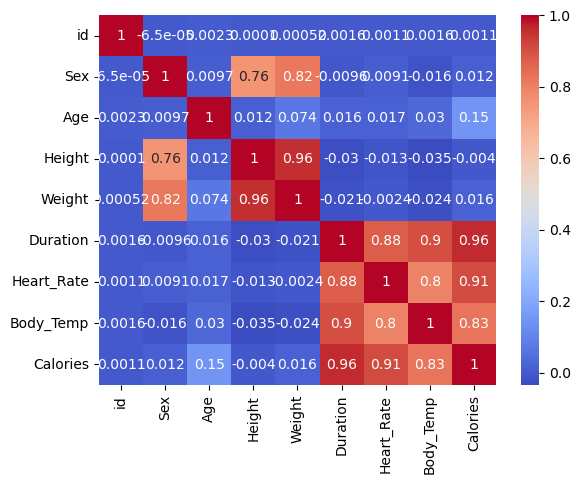

In [37]:
#Visualise the Correlation Matrix
sns.heatmap(correlation_matrix,fmt='.2g',annot=True, cmap='coolwarm')
plt.show()

**Model Training**

In [38]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")  # Suppress CatBoost warnings for clean output

In [39]:
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0


In [40]:
# Taking log value for target variable'Calories' 
train['Log_Calories'] = np.log1p(train['Calories'])
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Log_Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,5.017280
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,3.555348
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,3.401197
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,4.948760
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,4.990433
...,...,...,...,...,...,...,...,...,...,...
749995,749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0,5.442418
749996,749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0,4.574711
749997,749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0,5.402677
749998,749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0,4.700480


In [41]:
#Extract the Feature Variable from the Training set
X=train.iloc[:,:-2].values
X

array([[0.00000e+00, 1.00000e+00, 3.60000e+01, ..., 2.60000e+01,
        1.01000e+02, 4.10000e+01],
       [1.00000e+00, 0.00000e+00, 6.40000e+01, ..., 8.00000e+00,
        8.50000e+01, 3.97000e+01],
       [2.00000e+00, 0.00000e+00, 5.10000e+01, ..., 7.00000e+00,
        8.40000e+01, 3.98000e+01],
       ...,
       [7.49997e+05, 1.00000e+00, 6.00000e+01, ..., 2.90000e+01,
        1.13000e+02, 4.09000e+01],
       [7.49998e+05, 1.00000e+00, 4.50000e+01, ..., 1.70000e+01,
        1.02000e+02, 4.03000e+01],
       [7.49999e+05, 0.00000e+00, 3.90000e+01, ..., 1.90000e+01,
        9.70000e+01, 4.06000e+01]])

In [42]:
#Extract the Target Variable from the Training set
y = train.iloc[:, -1].values
y

array([5.01727984, 3.55534806, 3.40119738, ..., 5.40267738, 4.70048037,
       4.6443909 ])

In [43]:
# Splitting the training set for Validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection & Hyperparameter Tuning**

In [44]:
# Define models and hyperparameters
model_grid = {
    "XGBRegressor": {
        "model": XGBRegressor(),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [100, 150],
            "max_depth": [8, 10]
        }
    },
    "LGBMRegressor": {
        "model": LGBMRegressor(),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "boosting_type": ['gbdt']
        }
    },
    "CatBoostRegressor": {
        "model": CatBoostRegressor(silent=True),  # Silent=True to suppress training logs
        "params": {
            "iterations": [100, 200],
            "learning_rate": [0.05, 0.1],
            "depth": [4, 6]
        }
    }
}

# Repeated K-Fold cross-validation setup
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Store best models
best_models = {}

In [45]:
# Train and Evaluate each model
for name, config in model_grid.items():
    print(f"\n Tuning {name} with Repeated K-Fold CV...")
    
    grid = GridSearchCV(estimator=config["model"],
                        param_grid=config["params"],
                        scoring="r2",
                        cv=rkf,
                        verbose=0,
                        n_jobs=-1)
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
       
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Mean CV R²: {grid.best_score_:.4f}")
    print(f"Test R² Score: {test_r2:.4f}")


 Tuning XGBRegressor with Repeated K-Fold CV...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean CV R²: 0.9957
Test R² Score: 0.9958

 Tuning RandomForestRegressor with Repeated K-Fold CV...
Best Parameters: {'max_depth': 10, 'n_estimators': 150}
Mean CV R²: 0.9942
Test R² Score: 0.9943

 Tuning LGBMRegressor with Repeated K-Fold CV...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 8
[LightGBM] [Info] Start training from score 4.141163
Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 200}
Mean CV R²: 0.9959
Test R² Score: 0.9960

 Tuning CatBoostRegressor with Repeated K-Fold CV...
Best Parameters: {'depth': 6, 'iterations'

**Training using the Best Model**

In [46]:
model = CatBoostRegressor(iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100)  # set verbose=100 for progress logs

In [47]:
model.fit(X_train, y_train)

0:	learn: 0.8734300	total: 170ms	remaining: 33.8s
100:	learn: 0.0614905	total: 14.2s	remaining: 13.9s
199:	learn: 0.0594760	total: 28.2s	remaining: 0us


In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.maximum(0, y_pred) 

In [49]:
# Evaluate Metrics using RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE: {rmsle:.4f}')

RMSLE: 0.0175


In [50]:
# Predict the target variable on the test dataset
y_pred_test = model.predict(test)

y_pred_test

array([3.33486854, 4.68552343, 4.47336865, ..., 4.32239173, 5.13215197,
       4.35414056])

In [51]:
y_pred_test = np.expm1(y_pred_test)
y_pred_test

array([ 27.07469239, 107.36697954,  86.65149321, ...,  74.36867422,
       168.38122987,  76.7999326 ])

**File Submission**

In [52]:
# Create a submission dataframe
submission = pd.DataFrame({
    'ID': test['id'],  
    'Calories': y_pred_test
})

# Save the submission dataframe as a CSV file
submission.to_csv('submission.csv', index=False)
submission.head()

,ID,Calories
0,750000,27.074692
1,750001,107.366980
2,750002,86.651493
3,750003,126.504310
4,750004,76.253377
